<a href="https://colab.research.google.com/github/Vitor-Sallenave/Formacao-em-NLP/blob/main/ML-and-DL/Spam_Classifier_Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***◾Libraries***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

## ***◾Uploading the Dataset***

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Importing the messages
messages = pd.read_csv('spam.csv')

Saving spam.csv to spam (1).csv


In [ ]:
messages.shape

(5572, 2)

In [ ]:
# Analyzing how the categories are distributed
messages.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
# Divinding the dataframe:
msgs = messages['Message']
classes = messages['Category']

## ***◾Vectorizing the text messages***

In [ ]:
# Initializing the vectorizer: TF-IDF calculates a weight for each word
vectorizer = TfidfVectorizer()

# The vectorizer needs to learn from the data (fit), creating a model.
# In order to apply what was learned on a corpus, we use 'transform'
vectorizer.fit(msgs)
matrix = vectorizer.transform(msgs)

In [ ]:
# Verifying if the rows were preserved
print(matrix.shape)
print(matrix.shape[0] == messages.shape[0])

(5572, 8709)
True


In [ ]:
# Visualizing the matrix
vectorizer.get_feature_names_out()[:20]

array(['00', '000', '000pes', '008704050406', '0089', '0121',
       '01223585236', '01223585334', '0125698789', '02', '0207',
       '02072069400', '02073162414', '02085076972', '021', '03', '04',
       '0430', '05', '050703'], dtype=object)

## ***◾Building the Machine Learning model***

In [ ]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(matrix, classes, test_size=0.3)

In [ ]:
X_test.shape

(1672, 8709)

In [ ]:
# Creating the Random Forest Model
RFC = RandomForestClassifier(n_estimators=500)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
# Classifying the data
predicts = RFC.predict(X_test)

## ***◾Evaluating the model***

In [ ]:
# Accuracy:
score = accuracy_score(y_pred=predicts, y_true=y_test)
print('Accuracy score: ', score)

Accuracy score:  0.9796650717703349


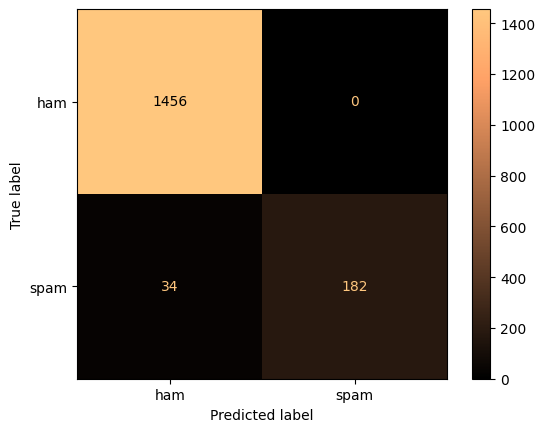

In [ ]:
# Confusion Matrix:
ConfusionMatrixDisplay.from_estimator(RFC, X_test, y_test, cmap='copper')

In [ ]:
# Displaying the main metrics:
print(classification_report(y_pred=predicts, y_true=y_test))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1456
        spam       1.00      0.84      0.91       216

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

